AIM
[0.09999999999999964, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] [38.36676733 34.79945173 31.75978079 28.73333999 24.55714876 24.24676529
 24.42364187 23.76486075 22.06412289 22.44401543 21.61888074 21.55199621] [3.45951478 1.85918139 0.56799391 1.33874527 0.88485812 1.21273303
 0.5607305  0.49409119 0.77455192 1.26384685 0.5400534  1.26580529]
MST
[0.09999999999999964, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] [41.60698783 40.5136581  35.77454015 30.76444968 29.1985495  27.93462158
 28.23979916 28.10176918 26.67960803 26.89082666 26.33044113 25.98802629] [2.84330178 1.01647025 2.0685137  0.90152982 0.78597436 1.01017517
 1.26823079 0.99022901 0.84805113 1.37279518 1.12898508 1.20048787]


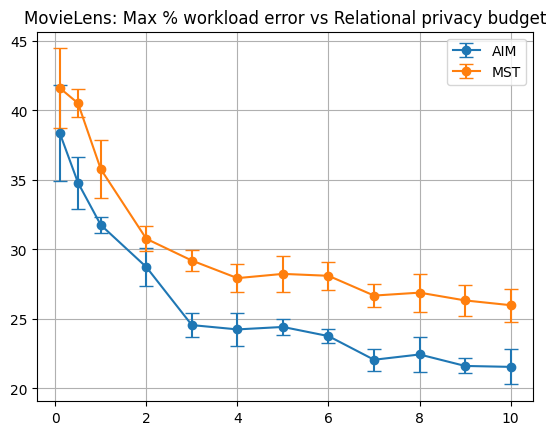

AIM
[0, 1, 5, 10, 15, 25, 40] [31.51365178 25.41601951 20.86380663 22.40543792 21.51798242 22.98300084
 23.69790665] [0.85729048 0.65933043 0.8781196  0.61693539 0.58195141 0.74541912
 0.9146799 ]
MST
[0, 1, 5, 10, 15, 25, 40] [34.51900966 30.21495669 30.26518665 29.28377552 29.35272649 30.53589391
 32.26083591] [0.63351049 0.61544266 0.6524645  0.86338991 1.51386475 0.
 0.        ]


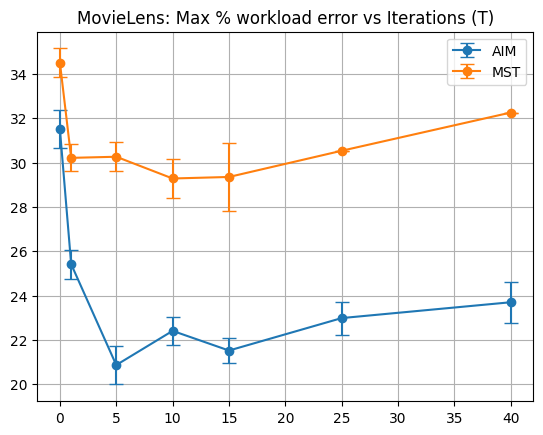

AIM
[1e-05, 0.2, 0.5, 0.8, 0.99999] [27.87851121 26.43256239 29.18969937 32.7642854  39.88815621] [1.44152819 1.07901251 0.82014137 1.8800034  2.78088148]
MST
[1e-05, 0.2, 0.5, 0.8, 0.99999] [30.31578916 30.75620366 32.26444699 37.1054545  47.75136136] [0. 0. 0. 0. 0.]


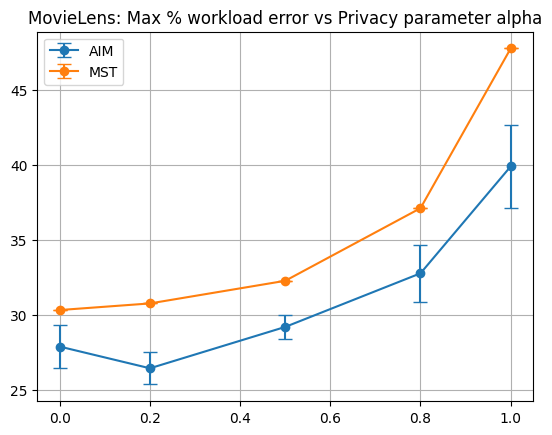

AIM
[1, 2, 4, 8] [35.17643819 34.71672252 30.0497022  27.63310849] [1.60102581 0.66678402 1.92368547 0.72621774]
MST
[1, 2, 4, 8] [35.344855   34.82544603 31.26854026 31.35318001] [0. 0. 0. 0.]


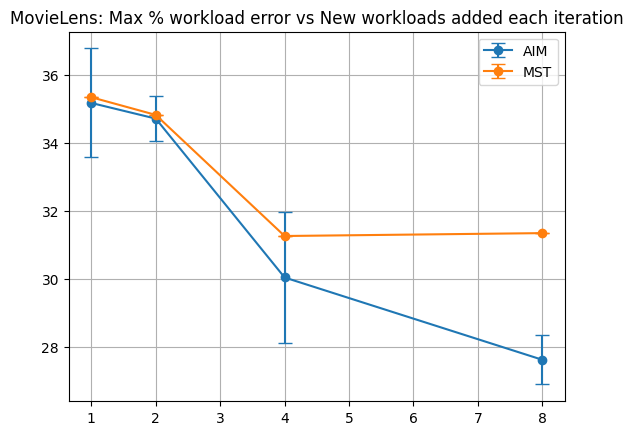

AIM
[1, 2, 4, 8, 15] [29.98845829 29.96761373 27.73358025 28.70713386 26.70580516] [0.48008139 0.43257276 1.85062262 1.49830079 0.99317047]
MST
[1, 2, 4, 8, 15] [31.86356916 33.80316773 29.85913464 30.61520377 32.56397198] [0. 0. 0. 0. 0.]


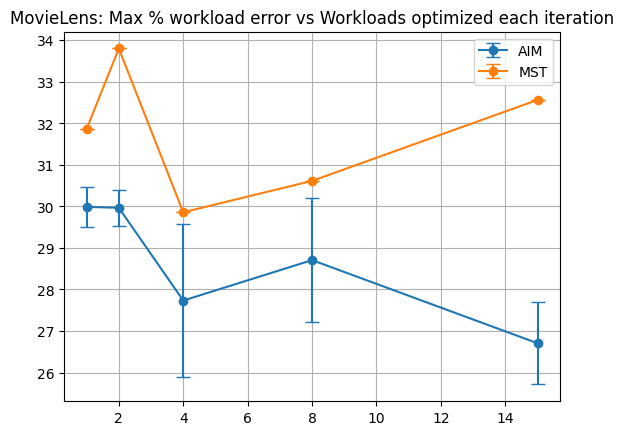

AIM
[0, 0.1, 0.3, 0.5] [27.12820562 27.53826755 27.99602261 27.78102437] [0.36645193 1.04652442 0.95907083 1.18474721]
MST
[0, 0.1, 0.3, 0.5] [31.39333166 30.01997776 32.21683664 30.55035994] [0. 0. 0. 0.]


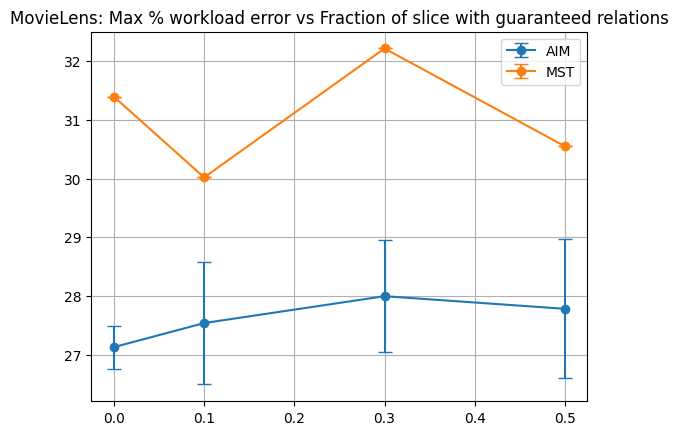

In [16]:
from dp_relational.lib.runner import ModelRunner

import matplotlib.pyplot as plt
import numpy as np

import uuid
from collections import defaultdict

AVE_ERROR = lambda x: x['error_ave']

def _max_error(experiment):
    errors = experiment['errors']
    max_error = 100 * np.max(np.array([np.sum(x) for x in errors]))
    return max_error
MAX_ERROR = _max_error

def _median_error(experiment):
    errors = experiment['errors']
    summed_errors = np.array([np.sum(x) for x in errors])
    return np.median(summed_errors) * 100
MEDIAN_ERROR = _median_error

def make_ave_error_plot(filtered_experiments, x_axis, y_axis=AVE_ERROR):
    # filter the experiments and plot them
    # we somehow need a criterion that we can put on the x axis

    criteria_data_dict = defaultdict(list)
    for experiment in filtered_experiments:
        # print(experiment)
        criteria = x_axis(experiment)
        criteria_data_dict[criteria].append(y_axis(experiment))
    
    # get all of the keys
    x_axis_values = sorted(criteria_data_dict.keys())
    # now compute the values and error bars for each one
    ave_y_axis = []
    std_y_axis = []
    for x_axis_value in x_axis_values:
        res_list_np = np.array(criteria_data_dict[x_axis_value])
        ave_y_axis.append(np.mean(res_list_np))
        # print(res_list_np)
        std_y_axis.append(np.std(res_list_np))
    
    return x_axis_values, np.array(ave_y_axis), np.array(std_y_axis)

def experiment_name_contains(name):
    def internal(x):
        return name in x['extra_params']['run_set']
    return internal

def experiment_name_contains_all(names):
    def internal(x):
        for name in names:
            if name not in x['extra_params']['run_set']:
                return False
        return True 
    return internal

def experiment_name_is(name):
    def internal(x):
        return name == x['extra_params']['run_set']
    return internal

def experiment_name_starts_with(name):
    def internal(x):
        return x['extra_params']['run_set'].startswith(name)
    return internal

def filter_and(*conditions):
    def internal(x):
        for condition in conditions:
            if not condition(x):
                return False
        return True 
    return internal

def filter_parameter(name, value):
    return lambda x: x['parameters'][name] == value

def select_parameter(name):
    return lambda x: x['parameters'][name]

def select_relational_eps():
    return lambda experiment: experiment['parameters']['epsilon'] - experiment['parameters']['eps1'] - experiment['parameters']['eps2']

def select_extra_parameter(name):
    return lambda x: x['extra_params']['info'][name]

pgd_ipums_eps = experiment_name_is("Medium PGD, eps study")
pgd_ipums_multi = filter_and(experiment_name_starts_with("Medium PGD"), experiment_name_contains('multiparameter'))
pgd_ipums_multi_eps = experiment_name_contains_all(["Medium PGD", 'multiparameter', 'eps'])

runner = ModelRunner(save_to='./runs')

def print_filter_information(filtered_experiments):
    # print all necessary high level information
    info_dict = defaultdict(set)
    filtered_exps = 0
    for experiment in filtered_experiments:
        filtered_exps += 1
        # add the epsilons
        info_dict['epsilon'].add(experiment['parameters']['epsilon'])
        info_dict['eps1'].add(experiment['parameters']['eps1'])
        info_dict['eps2'].add(experiment['parameters']['eps2'])
        info_dict['N1'].add(experiment['parameters']['n_syn1'])
        info_dict['N2'].add(experiment['parameters']['n_syn2'])
        info_dict['synth'].add(experiment['parameters']['synth'])
    print("Filtered experiments:", filtered_exps)
    print(info_dict)

# ============ T Experiments ============
# Ts, ave_errors, error_bars = get_errors_by_T(runner, filter_exp_T_large)
# plt.figure()
# plt.errorbar(Ts, ave_errors, error_bars, fmt='-o', capsize=5, label="Large syntables")
# plt.title("Average workload error vs iterations (eps_rel = 2.0)")
# plt.xlabel("Iterations (T)")
# plt.ylabel("Average % error")
# plt.legend()
# plt.grid()
# plt.show()

# ============ Epsilon Experiments ============

# epsilons, ave_errors, error_bars = get_errors_by_eps_rel(runner, filter_exp_orig)
# epsilons_o, ave_errors_o, error_bars_o = get_errors_by_eps_rel(runner, filter_exp_ojas)
# epsilons_l, ave_errors_l, error_bars_l = get_errors_by_eps_rel(runner, pgd_ipums_eps)
# epsilons_v, ave_errors_v, error_bars_v = get_errors_by_eps_rel(runner, filter_exp_masked_vlrge)

#plt.figure()
# plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label="Original generation")
# plt.errorbar(epsilons_o, ave_errors_o, error_bars_o, fmt='-o', capsize=5, label="Ojas masking method")
#plt.errorbar(epsilons_l, ave_errors_l, error_bars_l, fmt='-o', capsize=5, label="PGD")
#plt.title("Average workload error vs privacy budget")
#plt.xlabel("Relational privacy budget")
#plt.ylabel("Average % error")
#plt.legend()
#plt.grid()
#plt.show()

# ============ T 3-way Experiments ============
#Ts, ave_errors, error_bars = get_errors_by_T(runner, filter_exp_T_3way_final)
#Ts, ave_errors, error_bars = get_errors_by_T(runner, qtr)
#Ts_w, ave_errors_w, error_bars_w = get_errors_by_T(runner, qtr_w)
# T_p, ave_errors_p, error_bars_p = get_errors_by_T(runner, pgd_t)
##T_p, ave_errors_p, error_bars_p = get_errors_by_T(runner, pgd_ipums)
##T_g, ave_errors_g, error_bars_g = get_errors_by_T(runner, pgd_ipums_guar)
##plt.figure()

#plt.errorbar(Ts, ave_errors, error_bars, fmt='-o', capsize=5, label="5 workloads, random")
#plt.errorbar(Ts_w, ave_errors_w, error_bars_w, fmt='-o', capsize=5, label="5 workloads, worst")
##plt.errorbar(T_p, ave_errors_p, error_bars_p, fmt='-o', capsize=5, label="PGD medium (0 guaranteed)")
##plt.errorbar(T_g, ave_errors_g, error_bars_g, fmt='-o', capsize=5, label="PGD medium (50% guaranteed)")
##plt.title("Average 3-way workload error vs iterations (eps_rel = 2.0)")
##plt.xlabel("Iterations (T)")
##plt.ylabel("Average % error")
##plt.legend()
##plt.grid()
##plt.show()

# ============ Epsilon 3-way Experiments ============
#epsilons, ave_errors, error_bars = get_errors_by_eps_rel(runner, qtr_eps)
#epsilons_w, ave_errors_w, error_bars_w = get_errors_by_eps_rel(runner, qtr_w_eps)

#plt.figure()
#plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label="5 workloads, random")
#plt.errorbar(epsilons_w, ave_errors_w, error_bars_w, fmt='-o', capsize=5, label="5 workloads, worst")
#plt.title("Average 3-way workload error vs privacy budget, 5 workloads (T = 10)")
#plt.xlabel("Relational privacy budget")
#plt.ylabel("Average % error")
#plt.legend()
#plt.grid()
#plt.show()

import time

# =========== Multiparameter Experiments ===========
experiments = runner.get_experiments()
# experiments_with_times = runner.get_experiments(timed=True)
# with open("all_runs.txt", "w") as f:
#     f.write(str([(time.ctime(mtime), x['extra_params']['run_set']) for mtime, x in experiments_with_times]))

# curr_filter = experiment_name_contains("M8L_MediumPGD_Tfinal")# 11IPUMS_MediumPGD_eps

# curr_filter = filter_and(experiment_name_contains_all(["AMIPUMS_MediumPGD_Tfinal"]), filter_parameter("synth", "aim"))
# print_filter_information(filter(curr_filter, experiments))

# print(next(filter(curr_filter, experiments)))
# epsilons, ave_errors, error_bars = make_ave_error_plot(filter(curr_filter, experiments), select_relational_eps(), y_axis=MAX_ERROR)
# epsilons, ave_errors, error_bars = make_ave_error_plot(filter(curr_filter, experiments), select_extra_parameter("Tconst"), y_axis=MAX_ERROR)
# plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label="aim")

# curr_filter = experiment_name_contains("11IPUMS_MediumPGD_eps")
# print_filter_information(filter(curr_filter, experiments))
# epsilons, ave_errors, error_bars = make_ave_error_plot(filter(curr_filter, experiments), select_relational_eps(), y_axis=AVE_ERROR)
# plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label="mst")
# plt.legend()
# plt.grid()
# plt.show()

filter_dict = {
    "IPUMS": {
        "aim": {
            "eps_rel": "00IPUMS_MediumPGD_sn_eps",
            "T": "AMIPUMS_MediumPGD_Tfinal",
            "alpha": "AMIPUMS_MediumPGD_alpha",
            "K": "AMIPUMS_MediumPGD_knew",
            "q_reuse": "AMIPUMS_MediumPGD_q_reuse",
            "g_rels": "AMIPUMS_MediumPGD_g_in"
        },
        "mst": {
            "eps_rel": "00IPUMS_MediumPGD_sn_eps",
            "T": "00IPUMS_MediumPGD_Tfinal",
            "alpha": "00IPUMS_MediumPGD_alpha",
            "K": "00IPUMS_MediumPGD_knew",
            "q_reuse": "00IPUMS_MediumPGD_q_reuse",
            "g_rels": "00IPUMS_MediumPGD_g_in"
        }
    },
    "MovieLens": {
        "aim": {
            "eps_rel": "M7L_MediumPGD_eps",
            "T": "M8L_MediumPGD_Tfinal",
            "alpha": "M8L_MediumPGD_alpha",
            "K": "M8L_MediumPGD_knew",
            "q_reuse": "M8L_MediumPGD_q_reuse",
            "g_rels": "M8L_MediumPGD_g_in"
        },
        "mst": {
            "eps_rel": "M9L_MediumPGD_eps",
            "T": "M9L_MediumPGD_Tfinal",
            "alpha": "M9L_MediumPGD_alpha",
            "K": "M9L_MediumPGD_knew",
            "q_reuse": "M9L_MediumPGD_q_reuse",
            "g_rels": "M9L_MediumPGD_g_in"
        }
    }
}

x_axis_choice = {
    "eps_rel": select_relational_eps(),
    "T": select_extra_parameter("Tconst"),
    "alpha": select_extra_parameter("alpha"),
    "K": select_extra_parameter("k_new"),
    "q_reuse": select_extra_parameter("q_reuse"),
    "g_rels": select_extra_parameter("g_rels")
}

titles = {
    "eps_rel": "Relational privacy budget",
    "T": "Iterations (T)",
    "alpha": "Privacy parameter alpha",
    "K": "New workloads added each iteration",
    "q_reuse": "Workloads optimized each iteration",
    "g_rels": "Fraction of slice with guaranteed relations"
}

curr_y_axis = MAX_ERROR
dataset = "MovieLens"
parameter = "T"


for param in x_axis_choice.keys():
    parameter = param
    title = dataset + ": Max % workload error vs " + titles[parameter]
    for synth in ["aim", "mst"]:
        curr_filter = filter_and(experiment_name_is(filter_dict[dataset][synth][parameter]), filter_parameter("synth", synth))
        # print_filter_information(filter(curr_filter, experiments))
        epsilons, ave_errors, error_bars = make_ave_error_plot(filter(curr_filter, experiments), x_axis_choice[parameter], y_axis=curr_y_axis)
        print(synth.upper())
        print(epsilons, ave_errors, error_bars)
        plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label=synth.upper())
    plt.legend()
    plt.grid()
    plt.title(title)
    plt.show()

# curr_filter = experiment_name_contains("11IPUMS_MediumPGD_eps")
# print_filter_information(filter(curr_filter, experiments))
# epsilons, ave_errors, error_bars = make_ave_error_plot(filter(curr_filter, experiments), select_relational_eps(), y_axis=AVE_ERROR)
# plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label="mst")



# hyperp_in = 'k_new'
# hyperp_name = 'k_new'
# curr_filter = pgd_ipums_multi
# print_filter_information(filter(curr_filter, experiments))
# epsilons, ave_errors, error_bars = make_ave_error_plot(filter(curr_filter, experiments), select_extra_parameter(hyperp_in), y_axis=MEDIAN_ERROR)
# plt.figure()
# plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label=hyperp_in)
# plt.title("Average 3-way workload error vs privacy budget")
# plt.xlabel(hyperp_in)
# plt.ylabel("Average % error")
# plt.legend()
# plt.grid()
# plt.show()



#epsilons, ave_errors, error_bars = get_errors_by_eps_rel(runner, pgd_ipums_multi_eps)
#plt.figure()
#plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label='eps')
#plt.title("Average 3-way workload error vs eps rel")
#plt.xlabel('eps_rel')
#plt.ylabel("Average % error")
#plt.legend()
#plt.grid()
#plt.show()